# Erstellung von Graphiken mit Matplotlib

## Auftrag
Erstellen Sie eine Beispielsammlung von verschiedenen Arten von Graphiken mit Matplotlib; es sollte je ein Beispiel der folgenden Diagrammtypen berücksichtigt werden:
1. Funktionsgraphen, 
2. Mehrere Funktionsgraphen in der selben Graphik,
3. Balkendiagramme,
4. Tortendiagramme,
5. Histogramme.

## Umgebung
Damit die Snippets funktionieren, muss das folgende Python-Modul installiert sein.
* numpy
* matplotlib
* scipy

Die jeweilge Importe sind jeweils nur in den ersten Snippets aufgeführt, da die einzelnen Sippets aufeinander aufgaben.

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


### NumPy
Bei **NumPy** handelt es sich um eine Programmbibliothek für die Programmiersprache Python. Diese Bibliothek ermöglicht eine einfache Handhabung von grossen mehrdimensionalen Arrays. Dazu bietet **NumPy** effiziente Implementierungen von mathematischen Funktionen. 

###  Matplotlib
Bei **Matplotlib** handelt es sich um eine Programmbibliothek für die Programmiersprache Python. **Matplotlib** ermöglich eine graphische Darstellung sämtlicher mathematischen Funktionen und vielem mehr. Die erstellten Graphen können mit wenig Aufwand so konfiguriert werden, dass sie für fast alle Anwendungsbereiche geeignet sind. 

### SciPy
Bei **SciPy** handelt es sich um eine Programmbibliothek für die Programmiersprache Python. Diese Bibliothek ermöglicht es einfach Statistische Standardwerte zu generieren und noch vieles mehr.

## Funktionsgraphen

### Einfacher Funktionsgraph
Für den Auftrag **1 Funktionsgraphen** wurde die Allgemeine Normalverteilung (Gauss-Verteilung) ausgewählt. Bei der Normalverteilung handelt es sich in der Statistik um eine der am häufigsten verwendeten Verteilungsfunktionen. Das kommt daher, dass sich mit dieser Funktion viele technische, wirtschaftliche und naturwissenschaftliche Abhängigkeiten beschreiben lassen. Die Normalverteilung besitzt die bekannte Glockenkurve welche über zwei Parameter $\mu$ (Mittelwerts) und $\sigma^2$ (Variaz) und $\sigma$ wäre die Wurzel aus der Varianz und ist die Standardabweichung.  

$$f(x;\mu,\sigma^2)=\frac{1}{\sigma\sqrt{2\pi}}*e^-\frac{1}{2}(\frac{x-\mu}{\sigma})^2$$  
Der Parameter $\mu$ (`mu`) gibt den Erwartungswert an. Dieser legt fest, an welcher Stelle die Normalvertilung ihr Maximum haben wird. Der zweite Parameter $\sigma$ (`sigma`) gibt die Standardabweichung an.
* $\mu$ verschiebt den Mittelwert auf der X-Achse
* $\sigma$ lässt die Glockenkurve stärker/schwächer ausfallen  

In [62]:
import scipy.stats


def normalPDF(x, mu, simga):
    """ Generiert eine Normalverteilung als Wahrscheinlichkeitsdichtefunktion
        :param array x: Normalverteite Daten
        :param float mu: Mittelwert
        :param float sigma: Standartabweichung
        :retrun x, y: Berechneten Daten für die X- und Y-Achse
    """
    
    y = scipy.stats.norm.pdf(x, mu, simga)
    return x, y

Die Funktion `normalPDF` generiert mithilfe der Programmbibliothek **SciPy** eine Normalverteilung. Wie auch die Normalverteilung benötigt die Funktion `normalPDF` zwei Parameter `mu` für die Bestimmung des Mittelwert und `sigma` für die Bestimmung der Standardabweichung respektive für die Varianz. Die Normalverteilung wird anhand der Daten erstellt die mittels dem Parameter `x` übergeben werden. 

Mittels **Matplotlib** ist es sehr einfach einen Funktionsgraph zu erstellen. Dazu wird nur der Import der Programmbibliothek und die zwei Zeilen `plt.plot(x, y)` und `plt.show()` benötigt. Wobei die Parameter `x`und `y` die entsprechenden Daten als Array vorhanden sein müssen. Diese Daten werden über die zuvor beschriebene Funktion `normalPDF` generiert. Der restliche Programmcode ist selbstprechend und ist dafür da um den Graph lesbarer und informationsreicher zu gestallten.
Folgende nicht vollständige Liste beschreibt, was alles für den Graphen konfiguriert werden kann. 
* `xlabel`: Wird die X-Achse beschrieben
* `ylabel`: Wird die Y-Achse beschrieben
* `title`: Wird ein Titel für den Graphen gesetzt
* `grid`: Wird festgelegt ob das Gitter im Hintergrund dargestellt werden soll   

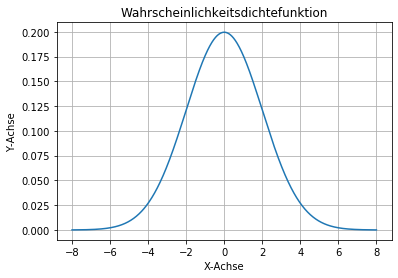

In [63]:
import matplotlib.pyplot as plt
import numpy as np


# Erstellt 1'000 Normalverteilte Daten zwsichen -8.0 und 8.0
x = np.linspace(-8.0, 8.0, 1000)

plt.title('Wahrscheinlichkeitsdichtefunktion')
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
plt.grid(True)

mu, sigma = 0.0, 2.0
x, y = normalPDF(x, mu, sigma)
plt.plot(x, y)

plt.show()

 ### Mehrere Funktionen in derselben Grafik
 Die Dahrstellung von mehreren Funktionen in derselben Grafik kann ebenfalls mit der `plot`-Funktion der **Matplotlib** erstellt werden. Dies durch mehrfaches Aufrufen der `plot`-Funktion mit den entsprechenden Parametern. Damit ersichtlich ist, welcher Graph welche Funktion abbildet, kann mittels der `legend`-Funktion eine Legende hinzugefügt werden.

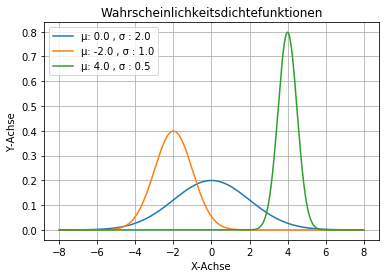

In [64]:
# Erstellt 1'000 Normalverteilte Daten zwsichen -8.0 und 8.0
x = np.linspace(-8.0, 8.0, 1000)

plt.title('Wahrscheinlichkeitsdichtefunktionen')
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
plt.grid(True)

mu_simga = [(0.0, 2.0), (-2.0, 1.0), (4.0, 0.5)]
for mu, sigma in mu_simga:
    x, y = normalPDF(x, mu, sigma)
    plt.plot(x, y, label=f'\u03BC: {mu} , \u03C3 : {sigma}')

plt.legend()
plt.show()

### Mehrere Funktionen in eigener Grafik als Subplot
Ähnlich wie bei einer Dahrstellung von mehreren Funktionen in derselben Grafik, können die Funktionen auch in eigenen Grafiken mit sogenannten Subplots dargestllt werden. Dazu kann vor dem Plotten mittels `subplot(row, column, index)` angegeben werden, aus wie vielen Zeilen (`row`) und Spalten (`column`) die Grafik besteht. Mittels dem dirtten Paramter `index` kann die genaue Stelle im Raster angegeben werden. Zusätzlich wurde die Farbe und Form der **Verteilungsfunktion** mit dem dritten Paramter `r-` definiert. Dabei steht `r` für die Farbe *red* und `-` für die Form. Für die Darstellung der Linen gibt es mehrere Formen. Anbei sind einige möglichkeiten aufgeführt.
* `r^`: Rote Dreiecke
* `g.`: Grüne Punkte
* `b+`: Blaue Dreiecke

Da nun die einzlenen Normalverteilungen in einzelnen Graphen dargestellt werden, wird zusätzlich ich den Graph noch die Verteilungsfunktion eingezeichnet. Die Verteilungsfunktikon wird über die Funktion `normalCDF` generiert. Diese Folgt dem gleichen Schema wie die `normalPDF`. Die Verteilungsfunktion beantwortet die Frage: "Mit welcher Wahrscheinlichkeit nimmt $X_N$ höchstens den Wert x an?". Die Verteilungsfunktion lautet für die Normalverteilung wie folgt.  
$$F_N(x|\mu,\sigma)=\int_{-\infty}^{x} \frac{1}{\sigma\sqrt{2\pi}}e^-\frac{1}{2}(\frac{u-\mu}{\sigma})^2$$

In [65]:
def normalCDF(x, mu, sigma):
    """  Generiert eine Normalverteilung als Verteilungsfunktion
        :param array x: Normalverteite Daten
        :param float mu: Mittelwert
        :param float sigma: Standartabweichung
        :retrun x, y: Berechneten Daten für die X- und Y-Achse
    """
    
    y = scipy.stats.norm.cdf(x, mu, sigma)
    return x, y 

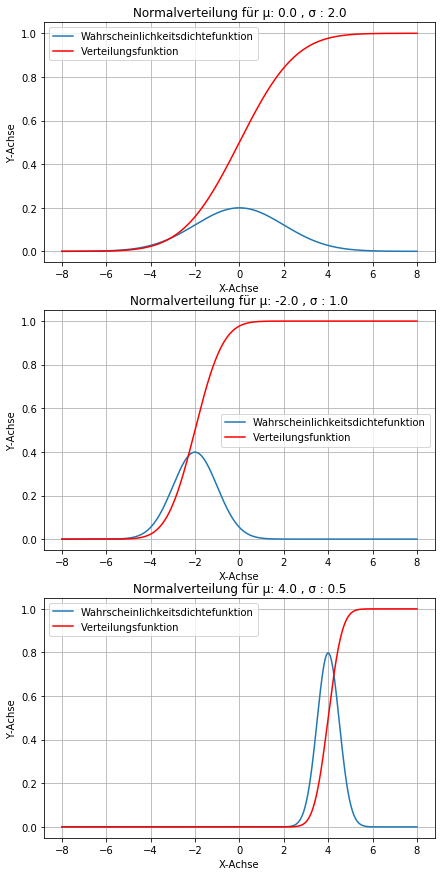

In [66]:
# Erstellt 1'000 Normalverteilte Daten zwsichen -8.0 und 8.0
x = np.linspace(-8.0, 8.0, 1000)

plt.figure(figsize=(7,15))

mu_simga = [(0.0, 2.0), (-2.0, 1.0), (4.0, 0.5)]
for i, values in enumerate(mu_simga, start=1):

    mu, sigma = values[0], values[1]

    plt.subplot(3, 1, i)
    plt.title(f'Normalverteilung für \u03BC: {mu} , \u03C3 : {sigma}')
    plt.xlabel('X-Achse')
    plt.ylabel('Y-Achse')
    plt.grid(True)
    
    x, y = normalPDF(x, mu, sigma)
    plt.plot(x, y, label='Wahrscheinlichkeitsdichtefunktion')
    x, y = normalCDF(x, mu, sigma)
    plt.plot(x, y, "r-", label=f'Verteilungsfunktion')
    plt.legend()
    

plt.show()

## Balkendiagramme
Ein Balkendiagramm eignet sich gut für diskrete Merkmale. In der Praxis bedeutet dies meist, dass es nur abzählbar viele Ausprägungen annehemen kann, trotzedem es endliche Ausprägungen gibt. Beispiele hier für währen Haarfarbe, Geschlecht, Teilnehmer an einer Veranstalltung. Trotzdem das es endliche Ausprägungen von Haarfarben gibt, werden diese in der Praxis in einem abzuzählbaren Rahmen befinden.  
Ein Balkendiagramm zeigt auf der X-Achse die verschiedenen Ausprägungen der Merkmalen. Die länge der Balken gibt die jeweilige Häufigkeit proportional zu den anderen Balken an. Dabei kann es sich hier um den absolute oder relative Häufigkeit handeln.  
Für das folgende Balkendiagramm wurde ein kompletter Doppelwurf eines Wüfels simuliert und jeweils die erste Augenzahl $a_1$ mit die zweite $a_2$ Augenzahl addiert. Dadurch entstehen Ausprägungen von $2$ bis $12$. 

$$Doppelwurf = \{(1,1),(1,2),...,(1,6),(2,1),(2,6),(6,6)\}$$  

Die Währscheinlichkeiten der möglichen Ausprägungen lauten also wie folgt.  

|$x$|2|3|4|5|6|7|8|9|10|11|12|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|$f(x)$|$\frac{1}{36}$|$\frac{1}{18}$|$\frac{1}{12}$|$\frac{1}{9}$|$\frac{5}{36}$|$\frac{1}{6}$|$\frac{5}{36}$|$\frac{1}{9}$|$\frac{1}{12}$|$\frac{1}{18}$|$\frac{1}{36}$|  

Die Funktion `doppelwurfDatenGenerieren` erstellt die oben aufgeführte Doppelwurf ergebnisse und zählt die Augenzahlen zusammen und berechnet die relative Häufigkeit.

In [67]:
import collections
import itertools


def doppelwurfDatenGenerieren():
    """ Simuliert ein kompletter Doppelwurf
        :return x, y: Berechneten Daten für die X- und Y-Achse
    """
    # Kompletter simulierter Doppelwurf
    merkmale = [i + j for i, j in itertools.product(range(1,7), range(1,7))]

    values = collections.Counter(merkmale)

    x, y = [], []
    for key, value in values.items():
        x.append(key)
        y.append(value/len(merkmale)) # Relative Häufigkeit
        
    return x, y

Im darauffolgenden Programm wird genau das obige Szenario durchgeführt und daraus ein Balkendiagramm erstellt. Auch ihr ergibt sich eine bekannte Form. Der Erwartungswert von $x$ ergibt sich aus den Ausprägungen $x_k$ und den dazu gehörenden Wahrscheinlichkeiten $f(x_k)$.

$$E(X)=\sum{k=1}^{11}x_k*f(x_k)=2*\frac{1}{36}+3*\frac{1}{18}+...+12*\frac{1}{36}=7$$

Zusätzlich zum Balkendiagramm wurde dazu noch die Verteilungsfunktion des Doppelwurs mittels einem `subplot` hinzugefügt. Das Balkendiagramm lässt sich mittels der Funktion `bar` der **Matplotlib** erstellen.  
Spannender ist das Stufendiagramm welches für die Verteilungsfunktion $F(x)$ verwendet wurde. Dieses läasst sich mittels der `step` Funktion erstellen. Zusätzlich kann hier angegeben werden, wo sich die Schneidepunkte der Schritte einer Funktion allfäligen weiteren Funktion befinden. Im unteren Programmcode wurde dies über den Parameter `where` und dem Werte `'post'` angegeben. Über den Parameter `alpha` kann die Deckkraft der Line bestimmt werden.
* `post`: Schrittstart
* `mid`: Schrittmitte
* `pre`: Schrittende  

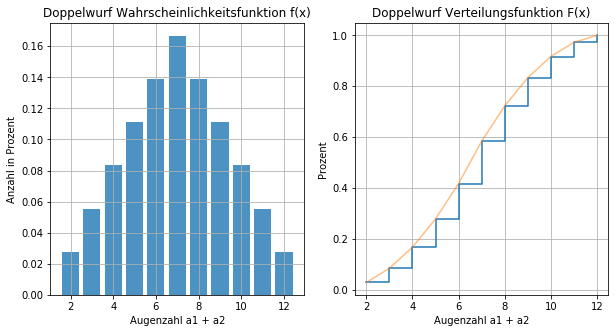

In [71]:
x, y = doppelwurfDatenGenerieren()
    
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)

plt.title('Doppelwurf Wahrscheinlichkeitsfunktion f(x)')
plt.xlabel('Augenzahl a1 + a2')
plt.ylabel('Anzahl in Prozent')
plt.grid(True)
plt.bar(x, y, alpha=0.8)


# Relative Empirische Verteilungsfunktion
y2 = list()
for index, value in enumerate(y):
    if index == 0:
        y2.append(value)
    else:
        y2.append(value + y2[index - 1])

plt.subplot(1, 2, 2)
plt.title('Doppelwurf Verteilungsfunktion F(x)')
plt.xlabel('Augenzahl a1 + a2')
plt.ylabel('Prozent')
plt.grid(True)
plt.step(x, y2, where='post')
plt.plot(x, y2, alpha=0.5)

plt.show()

## Tortendiagramme
Als Datenbasisi für das Tortendiagramm wurde die gleiche wie bei den Balkendiagrammen wiederverwendet. Die Darstellung des Tortendiagrammes kann mittels `pie`-Funktion der **Matplotlib** Programmierbibliothek erstellt werden. Als Parameter können Bezeichnungen sowie ensptrechende Werte mitgegeben werden. Bei diesem Beispiel wurde zusätzlich der Parameter `colors` mitgegeben, der die Farbe der Schnitte bestimmt, der Parameter `shadow`, der der Grafik eine leichte Schatteneffekt gibt, sowie der explode-Parameter, der den Teil des Erwartungswert abdockt. Zudem wurde mittels dem Parameter `startangle` das Tortendiagramm um 90-Grad gedreht.  
Unter dem [folgenden Link](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) sind alle Farben aufgeführt, welche für die Diagramme verwendet werden können.

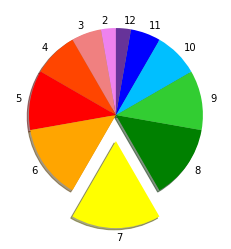

In [54]:
x, y = doppelwurfDatenGenerieren()

fig, ax = plt.subplots()

explode = (0,0,0,0,0,0.3,0,0,0,0,0)
colors = ['violet', 'lightcoral', 'orangered', 'red', 'orange', 'yellow', 'green', 'limegreen', 'deepskyblue', 'blue', 'rebeccapurple']
plt.pie(y, explode=explode, labels=x, shadow=True, colors=colors, startangle=90)

plt.show()

## Histogramme
Für das Histogramm wird wider eine Normalverteilung genneriert, eine ausführlichere Beschreibung dazu ist im Kapitel 'Funktionsgraphen' zu finden.  
Der erste Paramter 

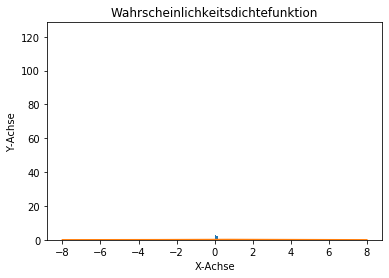

In [89]:
# Erstellt 1'000 Normalverteilte Daten zwsichen -8.0 und 8.0
x = np.linspace(-8.0, 8.0, 1000)

plt.title('Wahrscheinlichkeitsdichtefunktion')
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')

mu, sigma = 0.0, 2.0
x, y = normalPDF(x, mu, sigma)
count, bins, ignored = plt.hist(y, 100, density=True)
plt.plot(x, y)

plt.show()